In [2]:
import numpy as np
import pandas as pd

#reading and loading the Ecommerce dataset
dataset=pd.read_csv(r'C:\Users\ADMIN\Desktop\Datasets\E-commerce Customer Behavior - Sheet1.csv')
dataset.head()



,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,TRUE,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,FALSE,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,TRUE,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,FALSE,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,TRUE,55,Unsatisfied


In [3]:
#checking for missing values

missing_values=dataset.isnull().sum()
missing_values

#removing rows with missing values
#dataset=dataset.dropna(subset=['Satisfaction Level'])

#missing_values1=dataset.isnull().sum()
#missing_values1

#imputating the missing values with the mode
dataset['Satisfaction Level'].fillna(dataset['Satisfaction Level'].mode()[0],inplace=True)
missing_values2=dataset.isnull().sum()
missing_values2

Customer ID                  0
Gender                       0
Age                          0
City                         0
Membership Type              0
Total Spend                  0
Items Purchased              0
Average Rating               0
Discount Applied             0
Days Since Last Purchase     0
Satisfaction Level           0
dtype: int64

In [4]:
#Using one way ANOVA to investigate spending between the membership types(gold,silver and bronze)
#Null hypothesis:there is no diff in the mean of the spending of the three membership types
#alternative hypothesis:there is significant difference in the spending of the three membership types

from scipy.stats import f_oneway

#removing whitespaces in the Membership type column
dataset['Membership Type ']=dataset['Membership Type '].str.strip()

#filtering the columns of membership types with the total spend column
gold_type = dataset[dataset['Membership Type '] == 'Gold']['Total Spend ']
silver_type = dataset[dataset['Membership Type '] == 'Silver']['Total Spend ']
bronze_type = dataset[dataset['Membership Type '] == 'Bronze']['Total Spend ']
 
 #using one way ANOVA test to verify our hypothesis
anova_statistic,anova_p_value=f_oneway(gold_type,silver_type,bronze_type)
alpha=0.05
if anova_p_value>alpha:
    print("null hypothesis fails to be rejected thus there is no difference between the means of the membership type spending")
else:
    print("null hypothesis is rejected therefore there is a significant difference in the mean spending of the membership types")




null hypothesis is rejected therefore there is a significant difference in the mean spending of the membership types


Checking the mean spending of the three different membership types while also testing for the standard deviation to recommend if a new (platinum) membership type should be included by the company.

In [17]:
#checking the mean and variance of the membership types
gold_mean=np.mean(gold_type)
gold_std=np.std(gold_type)
gold_var=np.var(gold_type)

print('For the gold membership the mean spending is found to be at ${:.2f}, with a standard deviation of ${:.2f} from it the variance is {:.2f}'.format(gold_mean,gold_std,gold_var))

silver_mean=np.mean(silver_type)
silver_std=np.std(silver_type)
silver_var=np.var(silver_type)

print('For the silver membership the mean spending is found to be at ${:.2f}, with a standard deviation of ${:.2f} from it the variance is {:.2f}'.format(silver_mean,silver_std,silver_var))

bronze_mean=np.mean(bronze_type)
bronze_std=np.std(bronze_type)
bronze_var=np.var(bronze_type)
print('For the bronze membership the mean spending is found to be at ${:.2f}, with a standard deviation of ${:.2f} from it the variance is {:.2f}'.format(bronze_mean,bronze_std,bronze_var))


For the gold membership the mean spending is found to be at $1311.14, with a standard deviation of $151.28 from it the variance is 22885.43
For the silver membership the mean spending is found to be at $748.43, with a standard deviation of $60.33 from it the variance is 3640.28
For the bronze membership the mean spending is found to be at $473.39, with a standard deviation of $31.16 from it the variance is 971.21


Visually representing my findings using a box plot

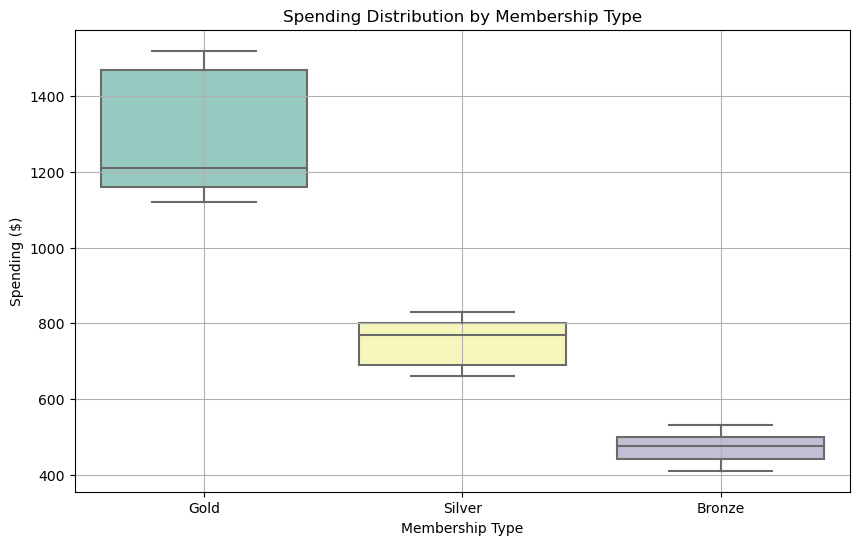

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Creating a dictionary to hold the spending data for each membership type
mem_types = {'Gold': gold_type, 'Silver': silver_type, 'Bronze': bronze_type}

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=list(mem_types.values()), palette='Set3')
plt.title('Spending Distribution by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Spending ($)')
plt.xticks(range(len(mem_types)), list(mem_types.keys()))

# Show plot
plt.grid(True)
plt.show()


From the findings above seeing as though the Gold membership has a relatively higher variance than the other membership types suggesting for a platinum membership would be a bit premature as further tests and analyses need to be done, recommend:
1.Collecting customer feedback and preferences through surveys or focus groups to understand their attitudes towards the existing membership program and their willingness to enroll in a new platinum membership tier. 
2.Build predictive models to forecast spending behavior for potential platinum members based on historical data and membership characteristics.